In [2]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 1.5 MB/s eta 0:00:00


In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
from skimage.metrics import structural_similarity as ssim
import math

def restore_image(image_path, original_image_path=None):
    # Load the noisy image from the given path
    noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the noisy image is loaded correctly
    if noisy_image is None:
        raise ValueError(f"Could not load noisy image from path: {image_path}")

    # Display the noisy image
    plt.figure(figsize=(5, 5))
    plt.title("Noisy Image")
    plt.imshow(noisy_image, cmap='gray')
    plt.show()

    # Flatten the image for HMM processing
    noisy_flat = noisy_image.flatten()

    # Normalize the noisy image
    scaler = StandardScaler()
    noisy_flat_normalized = scaler.fit_transform(noisy_flat.reshape(-1, 1))

    # Set up Hidden Markov Model (HMM)
    model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)

    # Fit the model to noisy data
    model.fit(noisy_flat_normalized)

    # Predict the most probable hidden state sequence (restored image)
    restored_flat = model.predict(noisy_flat_normalized)
    restored_image = restored_flat.reshape(noisy_image.shape)

    # Show the restored image
    plt.figure(figsize=(5, 5))
    plt.title("Restored Image using Viterbi Algorithm")
    plt.imshow(restored_image, cmap='gray')
    plt.show()

    # Calculate performance metrics if original image is provided
    if original_image_path is not None:
        # Load the original image
        original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

        # Check if the original image is loaded correctly
        if original_image is None:
            raise ValueError(f"Could not load original image from path: {original_image_path}")

        # Resize the original image to match the noisy image's dimensions
        original_image_resized = cv2.resize(original_image, (noisy_image.shape[1], noisy_image.shape[0]))

        # Calculate PSNR (Peak Signal-to-Noise Ratio)
        mse = np.mean((original_image_resized - restored_image) ** 2)
        if mse == 0:
            psnr = 100  # No difference between images
        else:
            psnr = 20 * math.log10(255.0 / math.sqrt(mse))

        # Calculate SSIM (Structural Similarity Index)
        ssim_value = ssim(original_image_resized, restored_image)

        # Print performance metrics
        print(f"PSNR: {psnr} dB")
        print(f"SSIM: {ssim_value}")

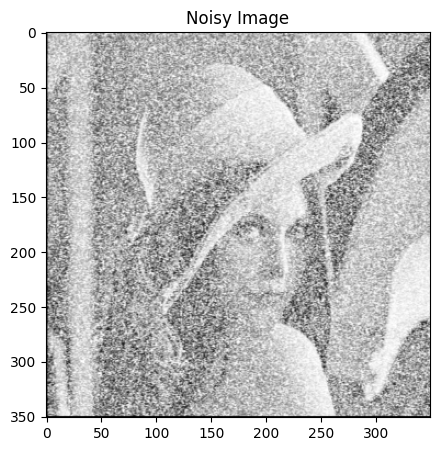

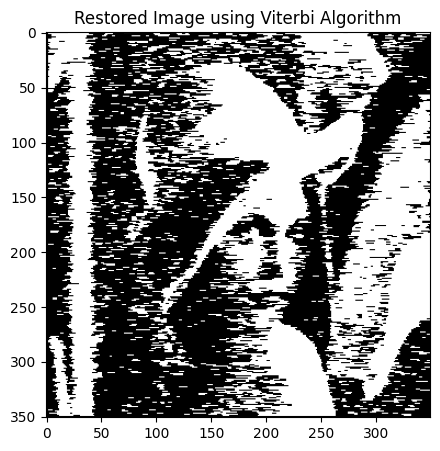

PSNR: 7.191961729609616 dB
SSIM: 0.004873320734492185


<ipython-input-26-61f4e6ec70ee>:66: UserWarning: Inputs have mismatched dtypes. Setting data_range based on im1.dtype.
  ssim_value = ssim(original_image_resized, restored_image)


In [35]:
restore_image('noisy1.png', original_image_path='ori1.jpg')

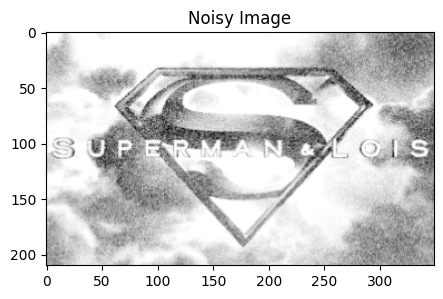

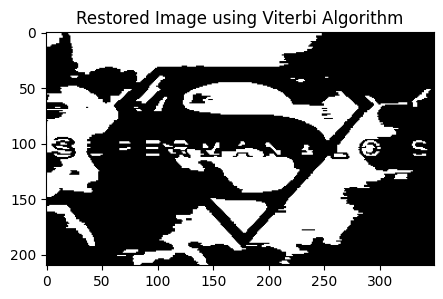

PSNR: 2.1779459535650854 dB
SSIM: 0.0019845008452839003


<ipython-input-26-61f4e6ec70ee>:66: UserWarning: Inputs have mismatched dtypes. Setting data_range based on im1.dtype.
  ssim_value = ssim(original_image_resized, restored_image)


In [34]:
restore_image('noisy2.png', original_image_path='ori2.png')